In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tqdm.notebook as tq
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from utils.crawler_utils import *

In [2]:
df = pd.read_csv('../data/comments/player/author/Kane_Premier_author_comments.csv')
df.shape

(296164, 5)

In [3]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

In [4]:
df_as = df.groupby(['author','subreddit'], as_index = False )['id'].count()
df_as.rename(columns={'id':'count'},inplace=True)

In [5]:
subreddits = list(df_as.subreddit.unique())

In [6]:
authors = list(df_as.author.unique())

In [7]:
s = df.groupby(['author','subreddit'])['id'].count()
s

author          subreddit   
AFC-Zain        Chiraqology     2
                MADFUT          1
                MCUTheories     1
                MatchAttax      1
                PopSmoke        2
                               ..
yourfriendkyle  videos          4
                wine            8
                woodworking     2
                workfromhome    1
                xbiking         7
Name: id, Length: 6834, dtype: int64

In [8]:
for author in tq.tqdm(authors):
    for subreddit in subreddits:
        if (author,subreddit) not in s.index:
            s.loc[(author,subreddit)] = 0

In [52]:
s.sort_values()[-10:]

author              subreddit         
MotoMkali           nba                    2846
_stone_age          soccer                 2912
mayonnaisewastaken  FantasyPL              3007
wayofthegenttickle  distantsocializing     3074
Gaius_Octavius_     coys                   3163
MrVegosh            soccer                 3279
_stone_age          MCFC                   3385
Tahapatel           soccer                 3706
MotoMkali           warriors               3987
ChrisMartins001     MoviePosterPorn       67859
Name: id, dtype: int64

In [53]:
df_as = s.reset_index()

In [57]:
df_as.rename(columns={'id':'count'},inplace=True)
df_as

,author,subreddit,count
0,AFC-Zain,Chiraqology,2
1,AFC-Zain,MADFUT,1
2,AFC-Zain,MCUTheories,1
3,AFC-Zain,MatchAttax,1
4,AFC-Zain,PopSmoke,2
...,...,...,...
263929,yourfriendkyle,MasterchefAU,0
263930,yourfriendkyle,TheAmazingRaceAU,0
263931,yourfriendkyle,bangalore,0
263932,yourfriendkyle,galaxyzflip,0


In [58]:
count_a = []
for i in tq.tqdm(range(df_as.shape[0])):
    if df_as['count'].iloc[i] == 0:
        count_a.append(0)
    elif df_as['count'].iloc[i] < 10:
        count_a.append(1)
    elif df_as['count'].iloc[i] < 100:
        count_a.append(2)
    else:
        count_a.append(3)

In [60]:
df_as['count_a'] = count_a

In [23]:
scaler = StandardScaler()
scale_param = scaler.fit(df_as['count'].values.reshape(-1, 1))
df_as['count_scaled'] = scaler.fit_transform(df_as['count'].values.reshape(-1, 1), scale_param)
df_as

,author,subreddit,count,count_scaled
0,3V3RT0N,AccidentalRenaissance,1,-0.010645
1,3V3RT0N,AmITheAngel,1,-0.010645
2,3V3RT0N,AmItheAsshole,1,-0.010645
3,3V3RT0N,AskReddit,1,-0.010645
4,3V3RT0N,AskUK,55,0.472703
...,...,...,...,...
476899,yopper29,Switzerland,0,-0.019596
476900,yopper29,mauerstrassenwetten,0,-0.019596
476901,yopper29,programminghorror,0,-0.019596
476902,yopper29,thalassophobia,0,-0.019596


In [18]:
df_as = df_as.loc[df_as.subreddit!='MoviePosterPorn']

In [61]:
df_asp = df_as.copy()
scaler = MinMaxScaler()
scale_param = scaler.fit(df_asp['count_a'].values.reshape(-1, 1))
df_asp['count_scaled'] = scaler.fit_transform(df_asp['count_a'].values.reshape(-1, 1), scale_param)
df_asp

,author,subreddit,count,count_a,count_scaled
0,AFC-Zain,Chiraqology,2,1,0.333333
1,AFC-Zain,MADFUT,1,1,0.333333
2,AFC-Zain,MCUTheories,1,1,0.333333
3,AFC-Zain,MatchAttax,1,1,0.333333
4,AFC-Zain,PopSmoke,2,1,0.333333
...,...,...,...,...,...
263929,yourfriendkyle,MasterchefAU,0,0,0.000000
263930,yourfriendkyle,TheAmazingRaceAU,0,0,0.000000
263931,yourfriendkyle,bangalore,0,0,0.000000
263932,yourfriendkyle,galaxyzflip,0,0,0.000000


In [29]:
subreddits.remove('MoviePosterPorn')

ValueError: list.remove(x): x not in list

In [62]:
df_emb = pd.DataFrame(columns = subreddits,index = authors)
df_emb

,Chiraqology,MADFUT,MCUTheories,MatchAttax,PopSmoke,SquaredCircle,cobrakai,fantasybooking,fixingmovies,ksi,...,lordoftherings,malefashionadvice,meat,midcenturymodern,motorcycles,phillycycling,scifi,scrabble,workfromhome,xbiking
AFC-Zain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adamdel34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asriel_1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AweDaw76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTbenTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volanger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wallyrules75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wayofthegenttickle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xkcdthrowaway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_emb_1 = pd.DataFrame(columns = subreddits,index = authors)
df_emb_1

,AccidentalRenaissance,AmITheAngel,AmItheAsshole,AskReddit,AskUK,CanadaPolitics,CasualUK,Coronavirus,CoronavirusUK,Cricket,...,btcc,fuckthesuperleague,pointlesslygendered,snowboarding,BUENZLI,Switzerland,mauerstrassenwetten,programminghorror,thalassophobia,victoria3
3V3RT0N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700n10nk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1A2A3A4B1B2B3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APeckover27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASVP-Pa9e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
voliton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheresmyspacebar2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xaviernoodlebrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xkufix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_emb.shape

(186, 2564)

In [45]:
df_as2.describe()

,count,count_scaled
count,263835.000000,263835.000000
mean,0.025899,0.025899
std,0.158834,0.158834
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [63]:
df_as2 = df_as.set_index(['author','subreddit'])
df_as2

count  count_a
author         subreddit                       
AFC-Zain       Chiraqology           2        1
               MADFUT                1        1
               MCUTheories           1        1
               MatchAttax            1        1
               PopSmoke              2        1
...                                ...      ...
yourfriendkyle MasterchefAU          0        0
               TheAmazingRaceAU      0        0
               bangalore             0        0
               galaxyzflip           0        0
               zflip3                0        0

[263934 rows x 2 columns]

In [64]:
df_as2 = df_asp.set_index(['author','subreddit'])
df_as2

count  count_a  count_scaled
author         subreddit                                     
AFC-Zain       Chiraqology           2        1      0.333333
               MADFUT                1        1      0.333333
               MCUTheories           1        1      0.333333
               MatchAttax            1        1      0.333333
               PopSmoke              2        1      0.333333
...                                ...      ...           ...
yourfriendkyle MasterchefAU          0        0      0.000000
               TheAmazingRaceAU      0        0      0.000000
               bangalore             0        0      0.000000
               galaxyzflip           0        0      0.000000
               zflip3                0        0      0.000000

[263934 rows x 3 columns]

In [65]:
for author in tq.tqdm(authors):
    for subreddit in subreddits:
            df_emb.loc[author,subreddit] = df_as2.loc[(author,subreddit)]['count_scaled']

In [48]:
for author in tq.tqdm(authors):
    for subreddit in subreddits:
            df_emb_1.loc[author,subreddit] = df_as2.loc[(author,subreddit)]['count_scaled']

In [66]:
df_emb['author'] = authors
df_emb

,Chiraqology,MADFUT,MCUTheories,MatchAttax,PopSmoke,SquaredCircle,cobrakai,fantasybooking,fixingmovies,ksi,...,malefashionadvice,meat,midcenturymodern,motorcycles,phillycycling,scifi,scrabble,workfromhome,xbiking,author
AFC-Zain,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC-Zain
Adamdel34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adamdel34
Asriel_1985,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asriel_1985
AweDaw76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AweDaw76
BTbenTR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BTbenTR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volanger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,volanger
wallyrules75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wallyrules75
wayofthegenttickle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wayofthegenttickle
xkcdthrowaway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,xkcdthrowaway


In [49]:
df_emb_1['author'] = authors
df_emb_1

,AccidentalRenaissance,AmITheAngel,AmItheAsshole,AskReddit,AskUK,CanadaPolitics,CasualUK,Coronavirus,CoronavirusUK,Cricket,...,fuckthesuperleague,pointlesslygendered,snowboarding,BUENZLI,Switzerland,mauerstrassenwetten,programminghorror,thalassophobia,victoria3,author
3V3RT0N,0.000043,0.000043,0.000043,0.000043,0.002389,0.000521,0.000043,0.00013,0.000261,0.002346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3V3RT0N
700n10nk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700n10nk
A1A2A3A4B1B2B3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A1A2A3A4B1B2B3
APeckover27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,APeckover27
ASVP-Pa9e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ASVP-Pa9e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
voliton,0.0,0.0,0.0,0.0,0.000043,0.0,0.002867,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,voliton
wheresmyspacebar2,0.0,0.0,0.0,0.00013,0.000912,0.0,0.00013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wheresmyspacebar2
xaviernoodlebrain,0.0,0.0,0.0,0.005299,0.0,0.0,0.000087,0.0,0.0,0.0,...,0.000043,0.000043,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,xaviernoodlebrain
xkufix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000043,0.003866,0.000087,0.000087,0.000043,0.000087,xkufix


In [67]:
df_emb.to_csv('../data/Kane_Premier_embedding_MinMax.csv',index=False)

In [67]:
df_emb = pd.DataFrame(df_emb,columns = subreddits,index=authors)

In [60]:
ds = df.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

In [77]:
count_TOT = 0
count_Premier = 0
count_soccer = 0
count_ThreeLions = 0
count_football = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.subreddit[i] == 'coys':
        count_TOT = count_TOT + ds.cnt[i]
    if ds.subreddit[i] == 'PremierLeague':
        count_Premier = count_Premier + ds.cnt[i]
    if ds.subreddit[i] == 'soccer':
        count_soccer = count_soccer + ds.cnt[i]
    if ds.subreddit[i] == 'ThreeLions':
        count_ThreeLions = count_ThreeLions + ds.cnt[i]
    if ds.subreddit[i] == 'football':
        count_football = count_football + ds.cnt[i]
    if ds.subreddit[i] in all_abbr:
        count_all = count_all + ds.cnt[i]

In [78]:
print(count_TOT/df.shape[0])

0.029533290679988812


In [79]:
print(count_TOT/df.shape[0])
print(count_Premier/df.shape[0])
print(count_soccer/df.shape[0])
print(count_ThreeLions/df.shape[0])
print(count_football/df.shape[0])
print(count_all/df.shape[0])

0.0006216022588393949
0.6794965117481869
0.00018293687432715627
0.0004080162746773223
0.7816404169811393


In [78]:
df1 = pd.read_csv('../data/comments/player/author/sentiment/Kane_soccer_author_comments_sentiment.csv')
df1.shape

df1['time'] = pd.to_datetime(df1['time'])

st = datetime.fromisoformat('2021-01-01T00:00:00')
df1 = df1.loc[df1.time>=st]
df_sent = df1.copy()
df_sent = df_sent.groupby('author').mean()
print(df_sent['sentiment_score'].mean())

0.13877776513200693


In [81]:
df_posa = df_sent.loc[df_sent['sentiment_score']>0.1]
df_nega = df_sent.loc[df_sent['sentiment_score']<0.1]

In [85]:
posa = df_posa.index
nega = df_nega.index

In [87]:
'AnnieIWillKnow' in posa

True

In [88]:
ds = df1.groupby(['author','subreddit'], as_index = False)['id'].count()
ds_pos = ds.loc[ds.author.isin(posa)]
ds_neg = ds.loc[ds.author.isin(nega)]

ds_pos.rename(columns={'id':'cnt'},inplace=True)
ds_neg.rename(columns={'id':'cnt'},inplace=True)

/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [117]:
comments_pos = df1.loc[df1.author.isin(posa)]
comments_neg = df1.loc[df1.author.isin(nega)]

In [118]:
count_TOT = 0
count_Premier = 0
count_soccer = 0
count_ThreeLions = 0
count_football = 0
count_all = 0
for i in tq.tqdm(range(ds_pos.shape[0])):
    if ds_pos.subreddit.iloc[i] == 'coys':
        count_TOT = count_TOT + ds_pos.cnt.iloc[i]
    if ds_pos.subreddit.iloc[i] == 'PremierLeague':
        count_Premier = count_Premier + ds_pos.cnt.iloc[i]
    if ds_pos.subreddit.iloc[i] == 'soccer':
        count_soccer = count_soccer + ds_pos.cnt.iloc[i]
    if ds_pos.subreddit.iloc[i] == 'ThreeLions':
        count_ThreeLions = count_ThreeLions + ds_pos.cnt.iloc[i]
    if ds_pos.subreddit.iloc[i] == 'football':
        count_football = count_football + ds_pos.cnt.iloc[i]
    if ds_pos.subreddit.iloc[i] in all_abbr:
        count_all = count_all + ds_pos.cnt.iloc[i]
        
print("Club subreddit:",count_TOT/comments_pos.shape[0])
print("r/PremierLeague:",count_Premier/comments_pos.shape[0])
print("r/soccer:",count_soccer/comments_pos.shape[0])
print("r/ThreeLions:",count_ThreeLions/comments_pos.shape[0])
print("r/football:",count_football/comments_pos.shape[0])
print("all football related subreddits:",count_all/comments_pos.shape[0])


Club subreddit: 0.0844430268718603
r/PremierLeague: 0.0005182999760784627
r/soccer: 0.7331740127675342
r/ThreeLions: 3.048823388696839e-05
r/football: 5.863121901340075e-05
all football related subreddits: 0.8627278995483051


In [119]:
count_TOT = 0
count_Premier = 0
count_soccer = 0
count_ThreeLions = 0
count_football = 0
count_all = 0
for i in tq.tqdm(range(ds_neg.shape[0])):
    if ds_neg.subreddit.iloc[i] == 'coys':
        count_TOT = count_TOT + ds_neg.cnt.iloc[i]
    if ds_neg.subreddit.iloc[i] == 'PremierLeague':
        count_Premier = count_Premier + ds_neg.cnt.iloc[i]
    if ds_neg.subreddit.iloc[i] == 'soccer':
        count_soccer = count_soccer + ds_neg.cnt.iloc[i]
    if ds_neg.subreddit.iloc[i] == 'ThreeLions':
        count_ThreeLions = count_ThreeLions + ds_neg.cnt.iloc[i]
    if ds_neg.subreddit.iloc[i] == 'football':
        count_football = count_football + ds_neg.cnt.iloc[i]
    if ds_neg.subreddit.iloc[i] in all_abbr:
        count_all = count_all + ds_neg.cnt.iloc[i]

print(comments_neg.shape[0])
print("Club subreddit:",count_TOT/comments_neg.shape[0])
print("r/PremierLeague:",count_Premier/comments_neg.shape[0])
print("r/soccer:",count_soccer/comments_neg.shape[0])
print("r/ThreeLions:",count_ThreeLions/comments_neg.shape[0])
print("r/football:",count_football/comments_neg.shape[0])
print("all football related subreddits:",count_all/comments_neg.shape[0])


174855
Club subreddit: 0.06634640130393755
r/PremierLeague: 0.0015612936433044523
r/soccer: 0.6422521517829058
r/ThreeLions: 4.5752194675588345e-05
r/football: 0.0008292585284950388
all football related subreddits: 0.7420720025163707


In [70]:
print("Club subreddit:",count_TOT/df1.shape[0])
print("r/PremierLeague:",count_Premier/df1.shape[0])
print("r/soccer:",count_soccer/df1.shape[0])
print("r/ThreeLions:",count_ThreeLions/df1.shape[0])
print("r/football:",count_football/df1.shape[0])
print("all football related subreddits:",count_all/df1.shape[0])

Club subreddit: 0.4796785088162614
r/PremierLeague: 0.0025408399061736483
r/soccer: 0.2234057013798608
r/ThreeLions: 3.4853771003753754e-05
r/football: 0.0015928173348715464
all football related subreddits: 0.7082321121733766


In [68]:
df1 = pd.read_csv('../data/comments/player/author/Kane_TOT_author_comments.csv')
df1.shape

df1['time'] = pd.to_datetime(df1['time'])

ds = df1.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

count_TOT = 0
count_Premier = 0
count_soccer = 0
count_ThreeLions = 0
count_football = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.subreddit[i] == 'coys':
        count_TOT = count_TOT + ds.cnt[i]
    if ds.subreddit[i] == 'PremierLeague':
        count_Premier = count_Premier + ds.cnt[i]
    if ds.subreddit[i] == 'soccer':
        count_soccer = count_soccer + ds.cnt[i]
    if ds.subreddit[i] == 'ThreeLions':
        count_ThreeLions = count_ThreeLions + ds.cnt[i]
    if ds.subreddit[i] == 'football':
        count_football = count_football + ds.cnt[i]
    if ds.subreddit[i] in all_abbr:
        count_all = count_all + ds.cnt[i]

In [69]:
print("Club subreddit:",count_TOT/(df1.shape[0]-67859))
print("r/PremierLeague:",count_Premier/(df1.shape[0]-67859))
print("r/soccer:",count_soccer/(df1.shape[0]-67859))
print("r/ThreeLions:",count_ThreeLions/(df1.shape[0]-67859))
print("r/football:",count_football/(df1.shape[0]-67859))
print("all football related subreddits:",count_all/(df1.shape[0]-67859))

Club subreddit: 0.6282743067919326
r/PremierLeague: 0.0033279465337314085
r/soccer: 0.2926127804103098
r/ThreeLions: 4.565084408410711e-05
r/football: 0.0020862435746436953
all football related subreddits: 0.927629716873465


In [98]:
df1.shape[0]

296164

In [109]:
df1.groupby(['subreddit'])['id'].count().sort_values(ascending=False)[:10]

subreddit
MoviePosterPorn    67859
soccer             31211
PremierLeague      24021
coys               17316
nba                 6371
FantasyPL           5252
MCFC                4920
FIFA                4415
chelseafc           4207
warriors            3988
Name: id, dtype: int64

In [134]:
df1 = pd.read_csv('../data/comments/player/author/Kane_soccer_author_comments.csv')
df1.shape

df1['time'] = pd.to_datetime(df1['time'])

ds = df1.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

count_au = 0
for i in range(ds.author.nunique()):
    count_all = 0
    name = ds.author.unique()[i]
    temp = ds.loc[ds.author==name]
    for j in range(temp.shape[0]):
        if temp.subreddit.iloc[j] in all_abbr:
            count_all = count_all + temp.cnt.iloc[j]
    if count_all/(temp.cnt.sum())>0.8:
        count_au += 1

print(count_au)
print(ds.author.nunique())

61
116


In [131]:
ds.author.nunique()

94

In [135]:
ds = ds.loc[ds.subreddit.isin(all_abbr)]

In [137]:
ds = ds.groupby('subreddit')['cnt'].sum()

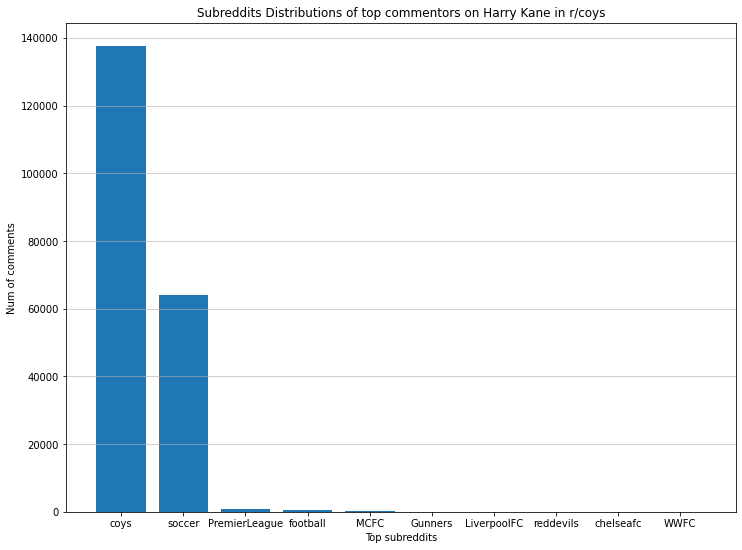

In [152]:
df1 = pd.read_csv('../data/comments/player/author/Kane_TOT_author_comments.csv')
df1.shape

df1['time'] = pd.to_datetime(df1['time'])

ds = df1.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(all_abbr)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top commentors on Harry Kane in r/coys')
plt.show()
